In [1]:
from classes.Card import *
from classes.Shoe import * 
from classes.Player import *
from classes.Dealer import *
from classes.Round import * 
from classes.Game import * 

from classes.DecisionModel import DecisionModel
from classes.DecisionModel import BaselineDecisionModel
from classes.DecisionModel import RainManDecisionModel
from classes.DecisionModel import DealerDecisionModel

from matplotlib import pyplot as plt

In [2]:
def test_decision_model(
        dealer_decision_model: DecisionModel, 
        player_decision_model: DecisionModel, 
        num_rounds=150000
    ):
    player = Player(10000, player_decision_model)
    dealer = Dealer(1000000, dealer_decision_model, num_decks=6)

    game = Game(dealer, verbose=0)

    wins = 0
    losses = 0
    balance = list()
    for i in range (num_rounds):
        round = game.execute_next_round([player])
        if (round.results[0] == 1): 
            wins += 1
        elif (round.results[0] == -1): 
            losses += 1
        balance.append(round.players[0].balance)
        
    print('final balance:', game.current_round.players[0].balance)
    print(f'wins: {wins}')
    print(f'losses: {losses}')
    print(f'winloss ratio: {wins / losses}')
    
    plt.plot(balance)

player hand is 12 , dealer hand is 7
probability of improvement is 0.6923076923076923

player hand is 18 , dealer hand is 20
probability of improvement is 0.2287581699346406

player hand is 16 , dealer hand is 12
probability of improvement is 0.3841059602649006

player hand is 20 , dealer hand is 10
probability of improvement is 0.0756013745704468

player hand is 18 , dealer hand is 15
probability of improvement is 0.22807017543859653

player hand is 13 , dealer hand is 7
probability of improvement is 0.6178571428571429

player hand is 15 , dealer hand is 7
probability of improvement is 0.4571428571428571

player hand is 17 , dealer hand is 17
probability of improvement is 0.30402930402930406

player hand is 19 , dealer hand is 15
probability of improvement is 0.15613382899628248

player hand is 9 , dealer hand is 11
probability of improvement is 1.0

player hand is 19 , dealer hand is 11
probability of improvement is 0.15909090909090917

final balance: 9997.0
wins: 3
losses: 5
winloss

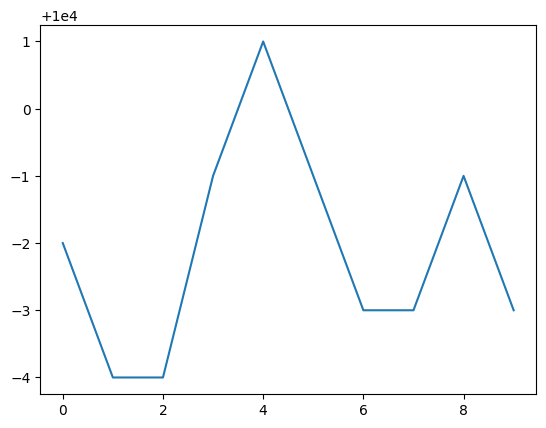

In [7]:
class RainManDecisionModel2(DecisionModel): 
    def decide_bet_amount(self, player: Player, game: Game) -> int: 
        return game.current_round.options.minimum_bet if (game.current_round.options.minimum_bet <= player.balance) else player.balance
    
    def decide_hit_or_stand(self, player: Player, game: Game) -> bool: 
        total = player.hand_total
        if (total < 21): 
            diff_21 = 21 - total
            prob_over_21 = game.card_count.probability_of_n_or_over(diff_21 + 1)
            prob_improvement = game.card_count.probability_of_n_or_under(diff_21)
            
            print('player hand is', total, ', dealer hand is', game.dealer.hand_total)
            print('probability of improvement is', prob_improvement)
            print('')
            
            
            #TODO: calculate probability of dealer having more 
            
            #print(prob_over_21)
            #print(prob_improvement)
            #print(prob_over_21 + prob_improvement)
            
            #print(prob_improvement)
            #if (prob_improvement > prob_over_21):
            #    print('hit on', total)
            #else: 
            #    print('stand on', total)
            return (prob_improvement > 0.5)
            
        return False
    
#TODO: (HIGH) how is win/loss ratio so high, but profit so low? 

test_decision_model(DealerDecisionModel(), RainManDecisionModel2(), 10)

final balance: 3231.0
wins: 64484
losses: 71828
winloss ratio: 0.8977557498468564


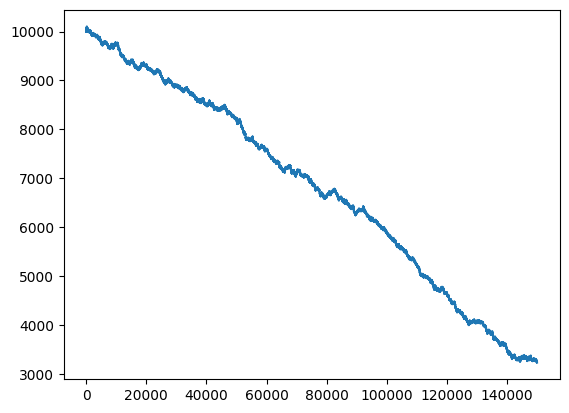

In [4]:
test_decision_model(BaselineDecisionModel(), BaselineDecisionModel())

final balance: 6811.0
wins: 64655
losses: 71765
winloss ratio: 0.9009266355465756


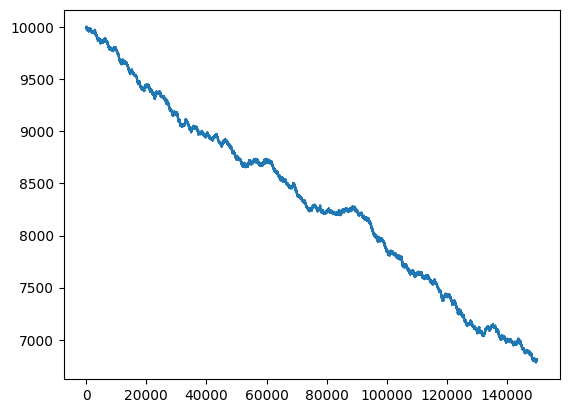

In [6]:
test_decision_model(DealerDecisionModel(), BaselineDecisionModel())